Problem Statement: To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above). 
1. Perform Data Preparation by cleaning the data and removing null values. 
2. Identify Which genres have higher user ratings. 
3. Identify the trend of user ratings based on pricing. 
4. State your inferences.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#% matplotlib inline

In [7]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, iplot, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
sns.set_style(style = 'whitegrid')
sns.set_palette(palette = 'hls')

In [9]:
df = pd.read_csv('./appstore_game_data.csv')

In [10]:
df.shape

(17007, 18)

In [11]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [12]:
store_list=[]

In [13]:
url_list = list(df['URL'])

In [14]:
for i in range(len(url_list)):
    which_store = str(url_list[i].split('/')[2].split('.')[1])
    if  which_store not in store_list:
        store_list.append(which_store)

In [15]:
store_list

['apple']

So, we can say that we are given data about apps available on <b>apple store</b>

## Drop Unuseful columns and null values

In [16]:
df.drop('URL', axis=1, inplace=True)

In [17]:
df.drop('Icon URL', axis=1, inplace=True)

In [18]:
df.drop('Subtitle', axis=1, inplace=True)

In [19]:
df.drop('ID', axis=1, inplace=True)

In [20]:
df.drop('Description', axis=1, inplace=True)

In [21]:
df.drop('Languages', axis=1, inplace=True)

In [22]:
df.drop('Developer', axis=1, inplace=True)

In [23]:
df.drop('Primary Genre', axis=1, inplace=True)

In [24]:
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,NaN,4+,15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,4+,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,4+,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [25]:
df.isna().sum()

Name                               0
Average User Rating             9446
User Rating Count               9446
Price                             24
In-app Purchases                9324
Age Rating                         0
Size                               1
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

<b>We would drop rows where Average user rating is not known to us.</b>

In [26]:
df = df[~df['Average User Rating'].isna()]

In [27]:
df.shape

(7561, 10)

In [28]:
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,NaN,4+,15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,4+,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,4+,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


<b> We would fill null values in In-app Purchase by zero </b>

In [29]:
df['In-app Purchases'].fillna(value='0.0', inplace=True)

In [30]:
df.isna().sum()

Name                            0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Age Rating                      0
Size                            0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

## Now, we have no null values in our dataset.

Now let change the 'Original Release Date' and 'Current Version Release Date' to datetime object.

In [31]:
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'])
df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'])

In [32]:
df['days_upto_last_updated'] = (df['Current Version Release Date'] - df['Original Release Date']).dt.days

In [33]:
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date,days_upto_last_updated
0,Sudoku,4.0,3553.0,2.99,0.0,4+,15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126
1,Reversi,3.5,284.0,1.99,0.0,4+,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,3478
2,Morocco,3.0,8376.0,0.00,0.0,4+,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,3105
3,Sudoku (Free),3.5,190394.0,0.00,0.0,4+,21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233
4,Senet Deluxe,3.5,28.0,2.99,0.0,4+,34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,3656


In [34]:
df.shape

(7561, 11)

Now, we would drop rows where User Rating Count < 200 AND days upto which it was last updated is < 180 days.

In [35]:
#df = df[df['User Rating Count'] <= 200]

In [36]:
#df = df[df['days_upto_last_updated'] < 180 ]  # It is not updated after six months of its release

Convert Age rating from string to int.

In [37]:
df['Age Rating'].replace(to_replace = ['4+','9+','12+','17+'], value = [4, 9, 12, 17], inplace = True)

Convert Genres to a single Genres

In [38]:
Genres_list = df['Genres']
item_in_genre_list = list(df['Genres'])

In [39]:
for i in range(len(item_in_genre_list)):
    single_list = item_in_genre_list[i].split(',')
    if 'Action' in single_list or ' Action' in single_list:
        item_in_genre_list[i] = 'Action'
    elif 'Puzzle' in single_list or ' Puzzle' in single_list:
        item_in_genre_list[i] = 'Puzzle'
    elif 'Family' in single_list or ' Family' in single_list:
        item_in_genre_list[i] = 'Family'
    elif 'Casual' in single_list or ' Casual' in single_list:
        item_in_genre_list[i] = 'Casual'
    elif 'Card' in single_list or ' Card' in single_list:
        item_in_genre_list[i] = 'Card'
    elif 'Word' in single_list or ' Word' in single_list:
        item_in_genre_list[i] = 'Word'
    elif 'Board' in single_list or ' Board' in single_list:
        item_in_genre_list[i] = 'Board'
    elif 'Simulation' in single_list or ' Simulation' in single_list:
        item_in_genre_list[i] = 'Simulation'
    elif 'Adventure' in single_list or ' Adventure' in single_list:
        item_in_genre_list[i] = 'Adventure'
    elif 'Role Playing' in single_list or ' Role Playing' in single_list:
        item_in_genre_list[i] = 'Role Playing'
    elif 'Casino' in single_list or ' Casino' in single_list:
        item_in_genre_list[i] = 'Casino'
    elif 'Sports' in single_list or ' Sports' in single_list:
        item_in_genre_list[i] = 'Sports'
    elif 'Education' in single_list or ' Education' in single_list:
        item_in_genre_list[i] = 'Education'
    elif 'Trivia' in single_list or ' Trivia' in single_list:
        item_in_genre_list[i] = 'Trivia'
    elif 'Racing' in single_list or ' Racing' in single_list:
        item_in_genre_list[i] = 'Racing'
    elif 'Lifestyle' in single_list or ' Lifestyle' in single_list:
        item_in_genre_list[i] = 'Lifestyle'
    elif 'Music' in single_list or ' Music' in single_list:
        item_in_genre_list[i] = 'Music'
    elif 'Social Networking' in single_list or ' Social Networking' in single_list:
        item_in_genre_list[i] = 'Social Networking'
    elif 'Health & Fitness' in single_list or ' Health & Fitness' in single_list:
        item_in_genre_list[i] = 'Health & Fitness'
    elif 'Strategy' in single_list or ' Strategy' in single_list:
        item_in_genre_list[i] = 'Strategy'

In [40]:
df['Genres'] = item_in_genre_list

In [41]:
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date,days_upto_last_updated
0,Sudoku,4.0,3553.0,2.99,0.0,4,15853568.0,Puzzle,2008-11-07,2017-05-30,3126
1,Reversi,3.5,284.0,1.99,0.0,4,12328960.0,Board,2008-11-07,2018-05-17,3478
2,Morocco,3.0,8376.0,0.00,0.0,4,674816.0,Board,2008-11-07,2017-05-09,3105
3,Sudoku (Free),3.5,190394.0,0.00,0.0,4,21552128.0,Puzzle,2008-07-23,2017-05-30,3233
4,Senet Deluxe,3.5,28.0,2.99,0.0,4,34689024.0,Board,2008-07-18,2018-07-22,3656


Summing up In-app Purchases

In [42]:
price_list = list(df['In-app Purchases'])
new_price_list = []

In [43]:
for i in range(len(price_list)):
    single_price_list = price_list[i].split(',')
    new_price=float(0.0)
    for j in range(len(single_price_list)):
        single_price_list[j] = float(single_price_list[j])
        new_price+=single_price_list[j]
    new_price_list.append(np.round(new_price))

In [44]:
#for item in new_price_list:
#    print(item, type(item))

In [45]:
n = df.columns[4]
df.drop(n, axis=1, inplace=True)

In [46]:
df.insert(4, n, value=new_price_list)

In [47]:
df['In-app Purchases'].astype('float')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16950    0.0
16956    0.0
16962    0.0
16967    0.0
16993    0.0
Name: In-app Purchases, Length: 7561, dtype: float64

In [48]:
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date,days_upto_last_updated
0,Sudoku,4.0,3553.0,2.99,0.0,4,15853568.0,Puzzle,2008-11-07,2017-05-30,3126
1,Reversi,3.5,284.0,1.99,0.0,4,12328960.0,Board,2008-11-07,2018-05-17,3478
2,Morocco,3.0,8376.0,0.00,0.0,4,674816.0,Board,2008-11-07,2017-05-09,3105
3,Sudoku (Free),3.5,190394.0,0.00,0.0,4,21552128.0,Puzzle,2008-07-23,2017-05-30,3233
4,Senet Deluxe,3.5,28.0,2.99,0.0,4,34689024.0,Board,2008-07-18,2018-07-22,3656


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7561 entries, 0 to 16993
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          7561 non-null   object        
 1   Average User Rating           7561 non-null   float64       
 2   User Rating Count             7561 non-null   float64       
 3   Price                         7561 non-null   float64       
 4   In-app Purchases              7561 non-null   float64       
 5   Age Rating                    7561 non-null   int64         
 6   Size                          7561 non-null   float64       
 7   Genres                        7561 non-null   object        
 8   Original Release Date         7561 non-null   datetime64[ns]
 9   Current Version Release Date  7561 non-null   datetime64[ns]
 10  days_upto_last_updated        7561 non-null   int64         
dtypes: datetime64[ns](2), float64

Adding new column 'Total Price' = 'Price' + 'In-app Purchases'

In [50]:
new_price_list = df['Price'] + df['In-app Purchases']

In [51]:
df.insert(5, 'Total Price', value = new_price_list)

Convert Size to MB

In [52]:
df['Size'] = (df['Size'] / (1024*1024))

Add a new column 'Paid' whose value is True if Price not equal to 0, otherwise free.

In [53]:
price = np.array(df['Total Price'])

In [54]:
paid = np.zeros(shape=len(price))

In [55]:
paid = paid.astype(np.str)

In [56]:
for i in range(len(price)):
    if price[i] != 0:
        paid[i] = 'Paid'
    else:
        paid[i] = 'Free'

In [57]:
df['Paid'] = paid

In [58]:
df['Count'] = 1

In [59]:
df['Year Of Release'] = df['Original Release Date'].dt.year

In [60]:
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Total Price,Age Rating,Size,Genres,Original Release Date,Current Version Release Date,days_upto_last_updated,Paid,Count,Year Of Release
0,Sudoku,4.0,3553.0,2.99,0.0,2.99,4,15.119141,Puzzle,2008-11-07,2017-05-30,3126,Paid,1,2008
1,Reversi,3.5,284.0,1.99,0.0,1.99,4,11.757812,Board,2008-11-07,2018-05-17,3478,Paid,1,2008
2,Morocco,3.0,8376.0,0.00,0.0,0.00,4,0.643555,Board,2008-11-07,2017-05-09,3105,Free,1,2008
3,Sudoku (Free),3.5,190394.0,0.00,0.0,0.00,4,20.553711,Puzzle,2008-07-23,2017-05-30,3233,Free,1,2008
4,Senet Deluxe,3.5,28.0,2.99,0.0,2.99,4,33.082031,Board,2008-07-18,2018-07-22,3656,Paid,1,2008


Games with size < 100 MB, 100 MB < size < 1 GB, > 1GB

In [61]:
less_than_100_MB = df[df['Size'] <= 100]

In [62]:
between_100_MB_1_GB = df[df['Size'] > 100]
between_100_MB_1_GB = between_100_MB_1_GB[between_100_MB_1_GB['Size'] < 1024]

In [63]:
#between_100_MB_1_GB

In [64]:
greater_than_1_GB = df[df['Size'] > 1024]

<AxesSubplot:xlabel='Average User Rating'>

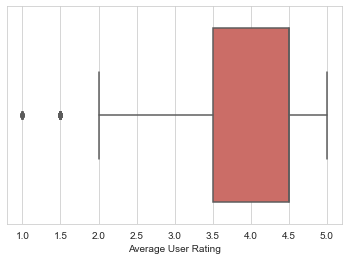

In [65]:
sns.boxplot(x='Average User Rating', data=df)

<AxesSubplot:xlabel='Average User Rating', ylabel='count'>

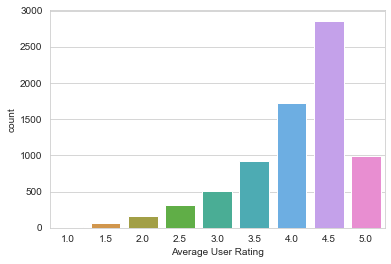

In [66]:
sns.countplot(x='Average User Rating', data=df)

<AxesSubplot:xlabel='Average User Rating', ylabel='count'>

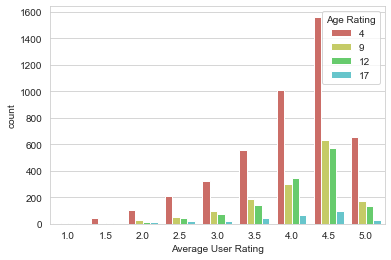

In [67]:
sns.countplot(x='Average User Rating', data=df, hue='Age Rating')

([<matplotlib.patches.Wedge at 0x23682c46ac0>,
 [Text(1.099981389468238, 0.006398657947176378, '1.0'),
  Text(1.0992647739610426, 0.040211400477702205, '1.5'),
  Text(1.0911210487835157, 0.13948066855862523, '2.0'),
  Text(1.0425894625020478, 0.3507238410483259, '2.5'),
  Text(0.8623504090880162, 0.682899532834612, '3.0'),
  Text(0.3283356835469385, 1.0498550751936027, '3.5'),
  Text(-0.7865741432083202, 0.7689610635370929, '4.0'),
  Text(-0.46916767864861514, -0.9949279819722983, '4.5'),
  Text(1.0082423694895308, -0.4398264707428789, '5.0')],
 [Text(0.5999898488008569, 0.003490177062096206, '0.19'),
  Text(0.599598967615114, 0.021933491169655744, '0.79'),
  Text(0.5951569357000993, 0.07608036466834102, '2.09'),
  Text(0.5686851613647532, 0.19130391329908683, '4.19'),
  Text(0.4703729504116451, 0.3724906542734247, '6.80'),
  Text(0.1790921910256028, 0.5726482228328741, '12.23'),
  Text(-0.42904044174999284, 0.4194333073838688, '22.77'),
  Text(-0.25590964289924456, -0.5426879901667081

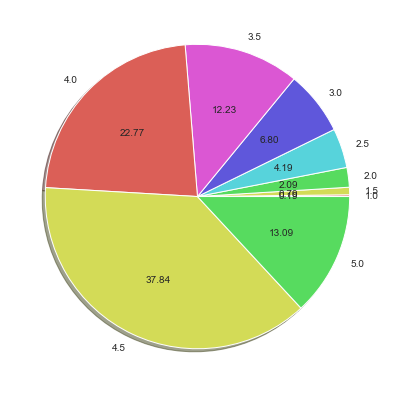

In [68]:
plt.figure(figsize=(7,7))
plt.pie(x=df.groupby('Average User Rating').sum()['Count'], data=df, labels = df.groupby('Average User Rating').sum().index, autopct='%.2f', shadow=True)

<AxesSubplot:xlabel='Average User Rating', ylabel='count'>

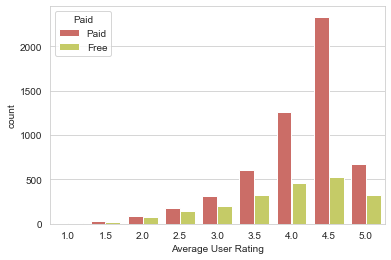

In [69]:
sns.countplot(x='Average User Rating', data=df, hue='Paid')

<AxesSubplot:xlabel='Average User Rating', ylabel='Size'>

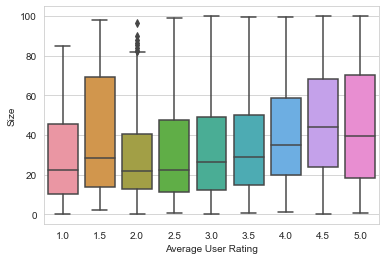

In [70]:
sns.boxplot(x='Average User Rating', y='Size', data=less_than_100_MB)

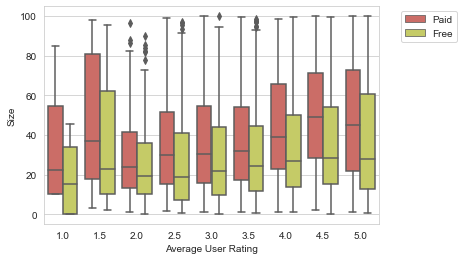

In [71]:
#plt.scatter(x='Price', y='In-app Purchases', data=df[df['Average User Rating']==4.0])
sns.boxplot(x='Average User Rating', y='Size', data=less_than_100_MB, hue='Paid')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

#### To get a user rating of 4.0 and above we should focus on game size > 35 MB upto 80 MB

<AxesSubplot:xlabel='Average User Rating', ylabel='Size'>

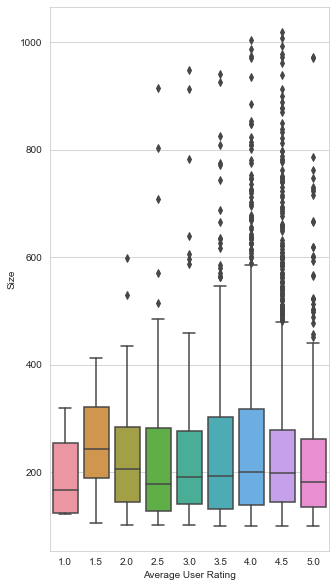

In [72]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Average User Rating', y='Size', data=between_100_MB_1_GB)

<AxesSubplot:xlabel='Average User Rating', ylabel='Size'>

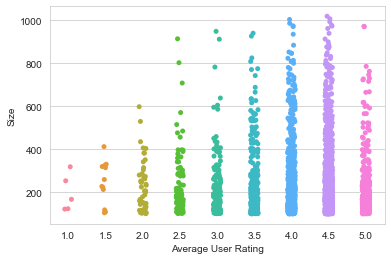

In [73]:
sns.stripplot(x='Average User Rating', y='Size', data=between_100_MB_1_GB)

<AxesSubplot:xlabel='Average User Rating', ylabel='Size'>

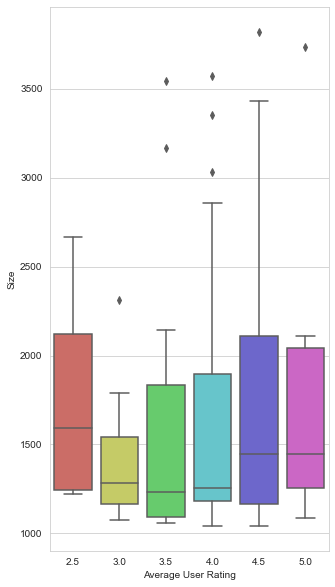

In [74]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Average User Rating', y='Size', data=greater_than_1_GB)

D:\users\SUSHIL\sushil\anaconda\installed\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

D:\users\SUSHIL\sushil\anaconda\installed\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Average User Rating', ylabel='Size'>

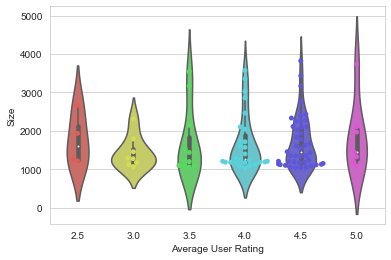

In [75]:
sns.violinplot(x='Average User Rating', y='Size', data=greater_than_1_GB)
sns.swarmplot(x='Average User Rating', y='Size', data=greater_than_1_GB)

#### If, we are having size of  our game > 1 GB then certainly it will get minimum Average User Rating of 2.5.

Text(0, 0.5, 'In-app Purchases')

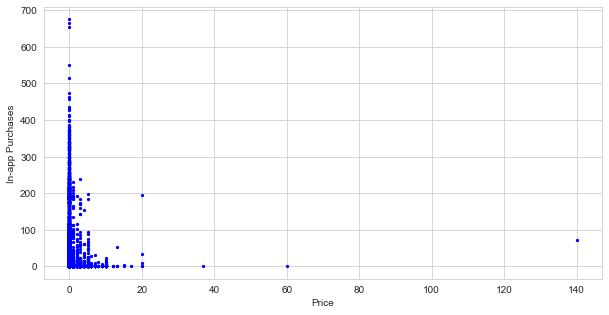

In [76]:
plt.figure(figsize=(10,5))
plt.scatter(x='Price', y='In-app Purchases', data=df, c='b', s=5)
plt.xlabel('Price')
plt.ylabel('In-app Purchases')

As Price Increases, In-app Purchases Decrease.

<AxesSubplot:xlabel='Genres', ylabel='count'>

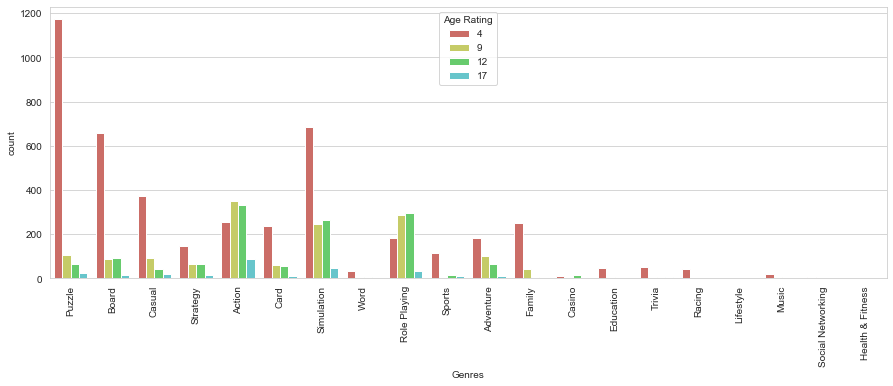

In [77]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x='Genres', data=df, hue='Age Rating')

<AxesSubplot:xlabel='Genres', ylabel='count'>

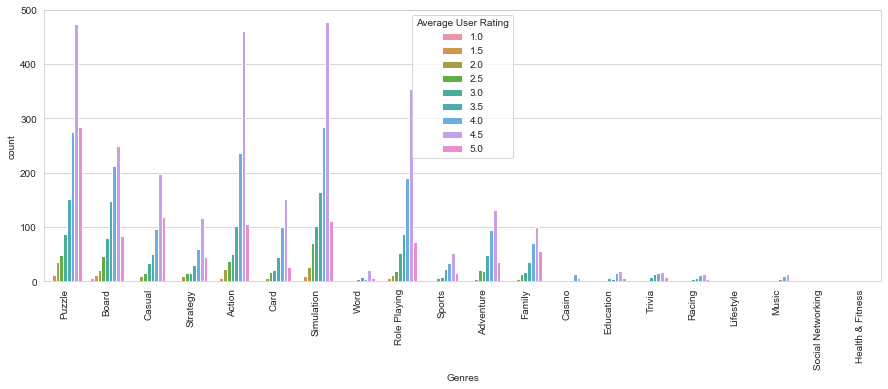

In [78]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x='Genres', data=df, hue='Average User Rating')

#### Most  of the Games in each Genre has an average user rating of 4.0 and above

In [79]:
#plt.figure(figsize=(15,5))
#plt.xticks(rotation=90)

In [80]:
by_genre = df.groupby('Genres').mean()
by_genre.reset_index(inplace=True)

In [81]:
by_genre

,Genres,Average User Rating,User Rating Count,Price,In-app Purchases,Total Price,Age Rating,Size,days_upto_last_updated,Count,Year Of Release
0,Action,4.107317,9620.567805,0.375249,53.950244,54.325493,9.425366,197.561729,595.655610,1.0,2015.011707
1,Adventure,4.022346,3064.234637,0.545726,40.022346,40.568073,7.262570,181.017816,542.282123,1.0,2014.969274
2,Board,3.879230,1434.388565,1.268996,11.032672,12.301669,5.627771,101.959359,1123.145858,1.0,2013.738623
3,Card,4.051771,2237.441417,0.687684,38.574932,39.262616,6.441417,150.415856,1059.275204,1.0,2014.348774
4,Casino,4.148148,2169.481481,0.406667,17.481481,17.888148,9.407407,64.067369,449.111111,1.0,2015.296296
5,Casual,4.203985,2125.089184,0.149184,18.777989,18.927173,5.988615,89.782917,463.343454,1.0,2015.324478
6,Education,4.150943,214.396226,1.052830,1.849057,2.901887,4.716981,122.639835,972.792453,1.0,2013.981132
7,Family,4.127517,2012.936242,0.284295,22.590604,22.874899,4.882550,119.196831,545.043624,1.0,2014.738255
8,Health & Fitness,4.666667,24.000000,0.000000,2.666667,2.666667,5.666667,56.509115,238.000000,1.0,2014.333333
9,Lifestyle,3.500000,28.250000,0.747500,0.500000,1.247500,6.000000,53.159912,1191.750000,1.0,2015.250000


Text(0.5, 1.0, 'Count of Games Genres wise')

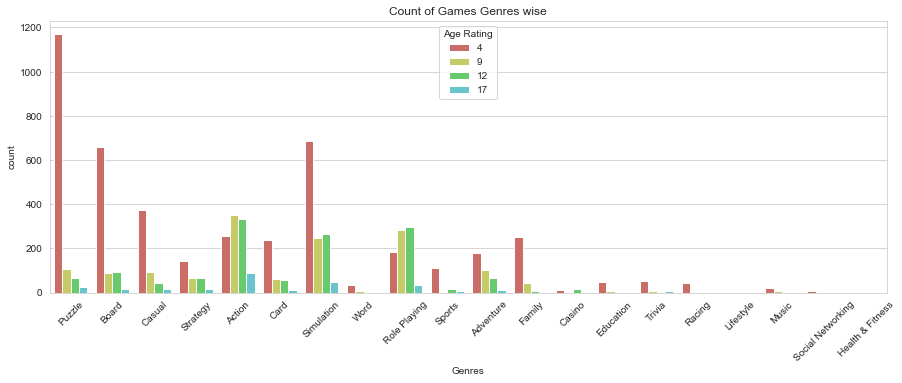

In [82]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(x='Genres', data=df, hue='Age Rating')
plt.title('Count of Games Genres wise')

#### From above plot we can see that most of the games are rated for age 4+, but the games like Action, Role Playing are rated for 9+ age group.

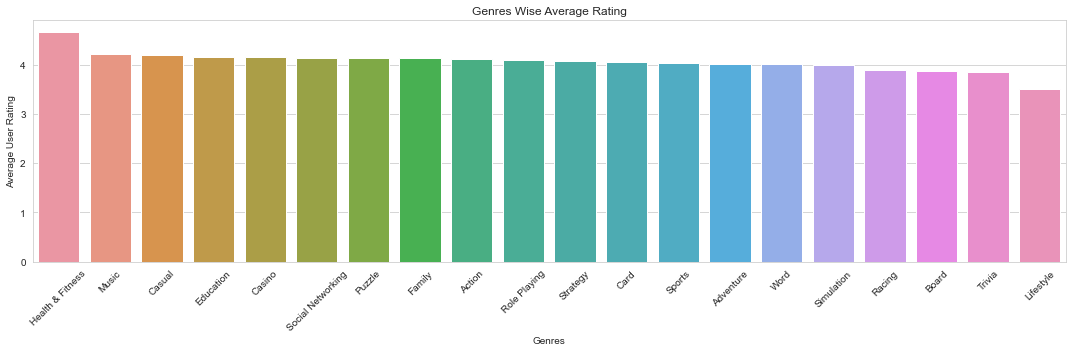

In [83]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Genres', y='Average User Rating', data=by_genre.sort_values(by='Average User Rating', ascending=False))
plt.title('Genres Wise Average Rating')
plt.tight_layout()

#### We can focus on games of Genres like Health & Fitness, Music,  Casual, Education, Casino, Social  Networking, Puzzle, Family, Action, Adventure, Role  Playig, Strategy, Card , Sports, Adventure to get an average user rating of 4.0 and above

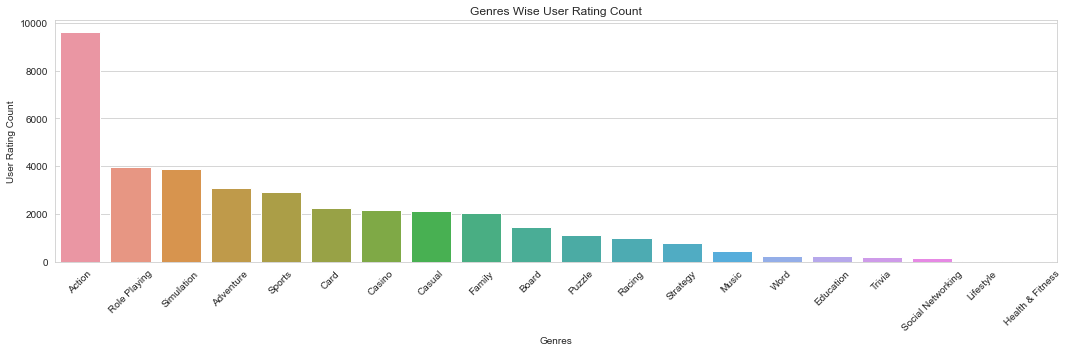

In [84]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Genres', y='User Rating Count', data=by_genre.sort_values(by='User Rating Count', ascending=False))
plt.title('Genres Wise User Rating Count')
plt.tight_layout()

#### Most people used to play games of genres like Action, Role Playing, Simulation, Adventre, Sports. Also, there is less competition in genres like Card, Casino, Casual, Family, Board, Puzzle, Racing, Strategy, so it is easy to get average user rating of 4.0 and above in these genres.

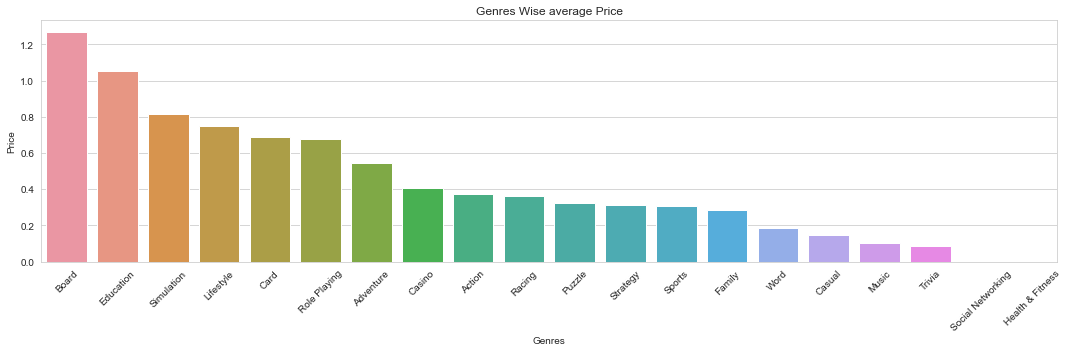

In [85]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Genres', y='Price', data=by_genre.sort_values(by='Price', ascending=False))
plt.title('Genres Wise average Price')
plt.tight_layout()

#### We can easily see that games of Genres like Board, Education, Simulation, Lifestyle, Card, Role Playing, Adventure games are costlier than other.

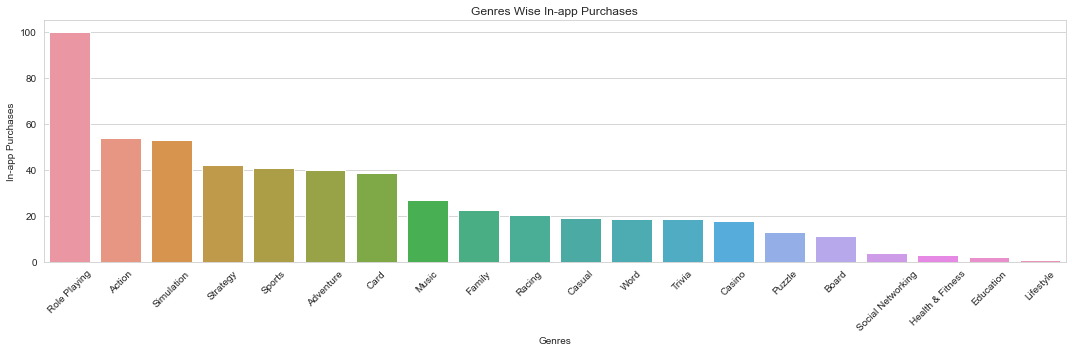

In [86]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Genres', y='In-app Purchases', data=by_genre.sort_values(by='In-app Purchases', ascending=False))
plt.title('Genres Wise In-app Purchases')
plt.tight_layout()

#### Games in Genre Role Playing are contain more In-app Purchases than Genres like Action, Simulation, Strategy, Sports, Adventure, Card, Music and others.

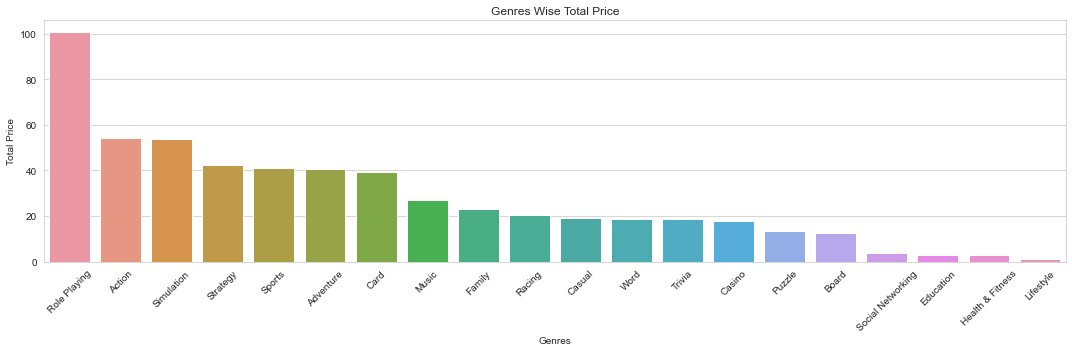

In [87]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Genres', y='Total Price', data=by_genre.sort_values(by='Total Price', ascending=False))
plt.title('Genres Wise Total Price')
plt.tight_layout()

#### Overall Price of the games follows the same trend as In-app Purchases. So, we can say that Overall Price of the games depends on In-app Purchases.

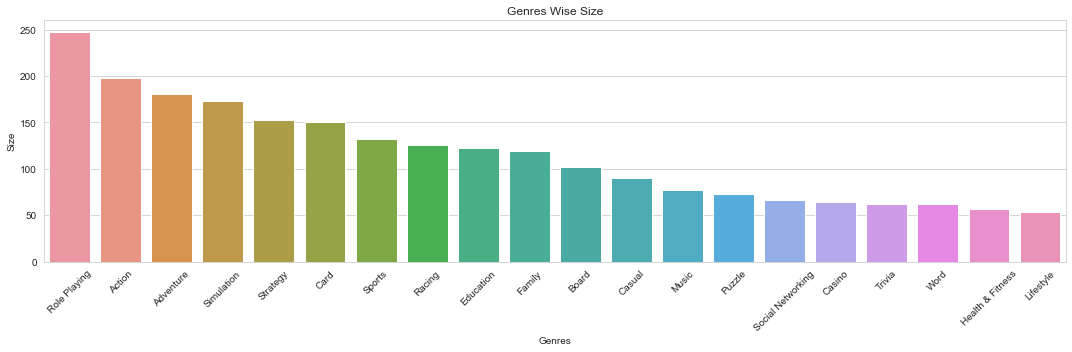

In [88]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Genres', y='Size', data=by_genre.sort_values(by='Size', ascending=False))
plt.title('Genres Wise Size')
plt.tight_layout()

#### Games in Genres like Role Playing, Action,, Adventure, Simulation, Strategy are larger in size than Genres like, Socia Networking, Casiono, Trivia, Word, Health and fitness, lifestyle while others are intermediate in size.

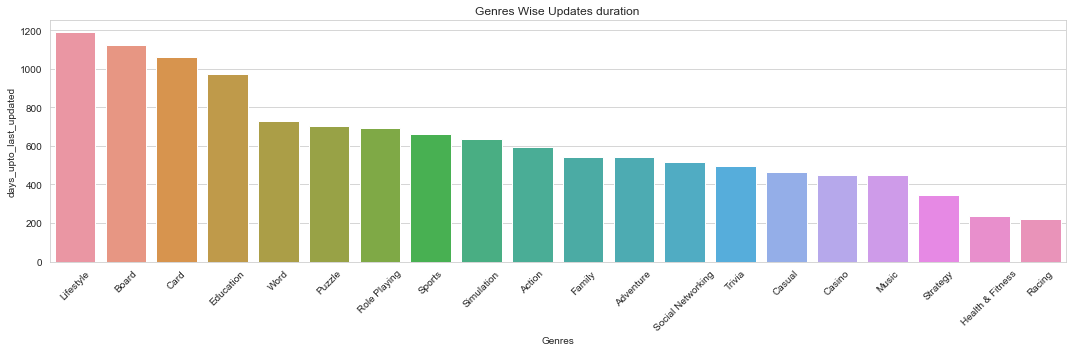

In [89]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Genres', y='days_upto_last_updated', data=by_genre.sort_values(by='days_upto_last_updated', ascending=False))
plt.title('Genres Wise Updates duration')
plt.tight_layout()

#### Games in Genres like Lifestyle, Board, Card, Education, Word, Puzzle are more frequentyly updated than Role Playing, Sports, Simulation, Action, Family, Adventure, Social Networking and all.

In [91]:
by_year = df.groupby('Year Of Release').mean()

In [92]:
#plt.scatter(x='Genres', y='days_upto_last_updated', data=by_genre)
by_year.reset_index(inplace=True)

In [93]:
by_year

,Year Of Release,Average User Rating,User Rating Count,Price,In-app Purchases,Total Price,Age Rating,Size,days_upto_last_updated,Count
0,2008,3.284091,14473.954545,1.494318,0.454545,1.948864,4.681818,22.980000,2638.431818,1.0
1,2009,3.302326,15172.703488,0.926163,6.802326,7.728488,5.883721,40.735573,2185.645349,1.0
2,2010,3.529412,3326.078431,1.109804,11.556863,12.666667,5.960784,49.295650,1825.972549,1.0
3,2011,3.866505,2222.308252,0.824684,21.878641,22.703325,6.225728,66.443245,1505.716019,1.0
4,2012,4.021739,7643.230769,0.648344,26.874582,27.522926,6.287625,86.722105,1267.772575,1.0
5,2013,4.003593,2287.941317,0.680970,34.445509,35.126479,6.471856,96.286848,948.706587,1.0
6,2014,4.030366,2574.894241,0.548283,30.926702,31.474984,6.383246,112.148217,673.358115,1.0
7,2015,4.100780,1821.760579,0.541860,35.967706,36.509566,6.821826,139.549644,590.688196,1.0
8,2016,4.105540,3607.345750,0.475349,48.090735,48.566084,7.240688,148.983307,426.109838,1.0
9,2017,4.204876,2795.542531,0.438631,53.839212,54.277842,7.512448,205.238894,310.313278,1.0


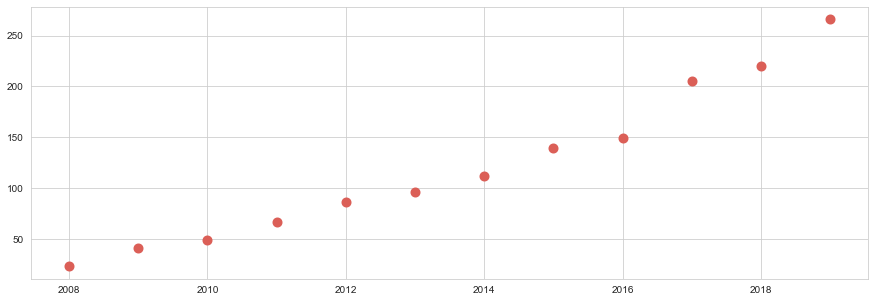

In [94]:
plt.figure(figsize=(15,5))
plt.scatter(x='Year Of Release', y='Size', data=by_year, linewidths=4.0, )


#### As years passed, size of games increases.

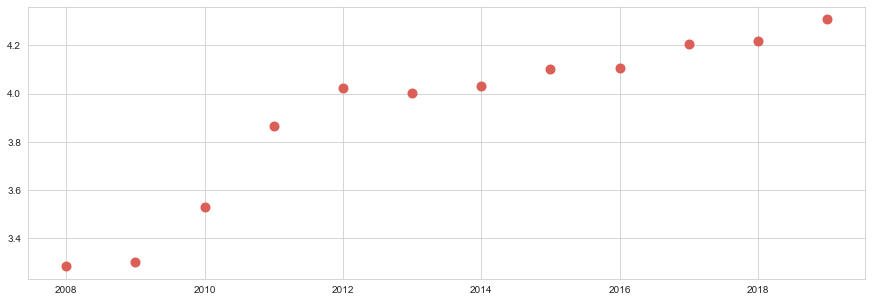

In [95]:
plt.figure(figsize=(15,5))
plt.scatter(x='Year Of Release', y='Average User Rating', data=by_year, linewidths=4.0, )

#### As years passed, people starts to give good ratings to the games.

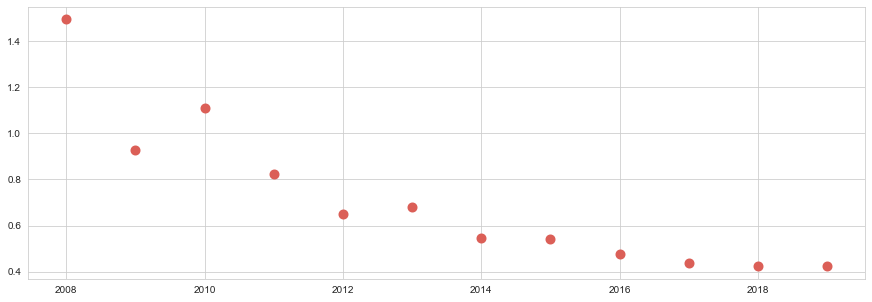

In [96]:
plt.figure(figsize=(15,5))
plt.scatter(x='Year Of Release', y='Price', data=by_year, linewidths=4.0, )

#### As years passed, price of games decreases day by day.

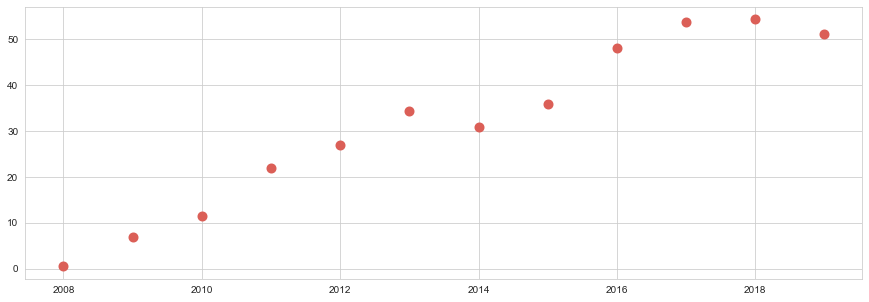

In [97]:
plt.figure(figsize=(15,5))
plt.scatter(x='Year Of Release', y='In-app Purchases', data=by_year, linewidths=4.0, )

#### As years passed, In-app Purchases of games increases day by day.

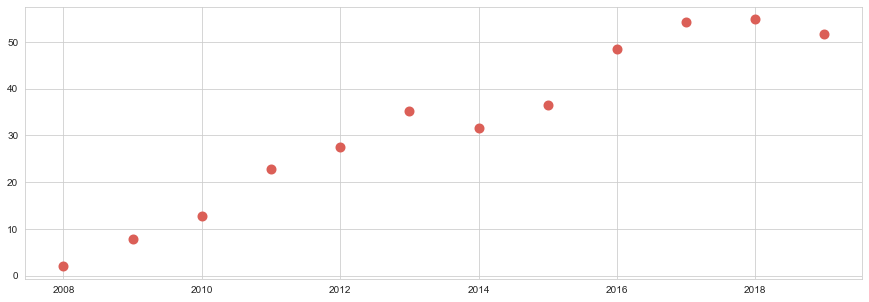

In [98]:
plt.figure(figsize=(15,5))
plt.scatter(x='Year Of Release', y='Total Price', data=by_year, linewidths=4.0 )

#### As years passed, overall price (Price + In-app Purchases) of games increases day by day.

In [99]:
by_average_user_rating = df.groupby('Average User Rating').mean()

In [100]:
by_average_user_rating.reset_index(inplace=True)

In [101]:
by_average_user_rating

,Average User Rating,User Rating Count,Price,In-app Purchases,Total Price,Age Rating,Size,days_upto_last_updated,Count,Year Of Release
0,1.0,8.785714,2.422143,1.285714,3.707857,7.928571,89.096606,445.357143,1.0,2014.785714
1,1.5,42.783333,0.631000,13.200000,13.831000,5.433333,81.998606,464.416667,1.0,2014.733333
2,2.0,59.835443,0.391013,19.658228,20.049241,6.512658,89.264802,548.677215,1.0,2014.468354
3,2.5,343.498423,0.392776,15.145110,15.537886,6.586751,114.336513,637.255521,1.0,2014.041009
4,3.0,956.571984,0.459397,25.066148,25.525545,6.638132,110.788849,731.167315,1.0,2013.762646
5,3.5,2703.645405,0.601438,26.126486,26.727924,6.806486,122.136851,765.510270,1.0,2013.847568
6,4.0,1434.719512,0.677067,40.589431,41.266498,6.993031,153.661390,770.664925,1.0,2014.512195
7,4.5,5608.326459,0.576589,53.989864,54.566452,7.142957,165.987608,721.119539,1.0,2015.233834
8,5.0,3405.142424,0.458172,25.775758,26.233929,6.348485,127.536637,436.933333,1.0,2016.205051


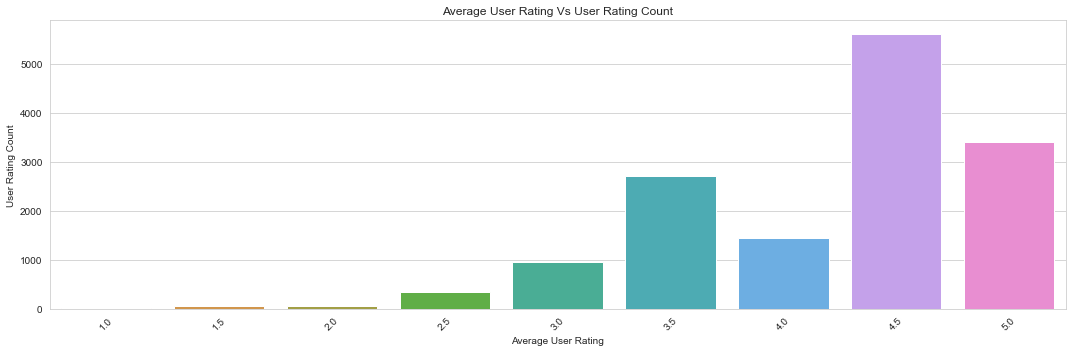

In [102]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Average User Rating', y='User Rating Count', data=by_average_user_rating)
plt.title('Average User Rating Vs User Rating Count')
plt.tight_layout()

#### Most peple give ratings 4.5, 5.0, 3.5 to the games

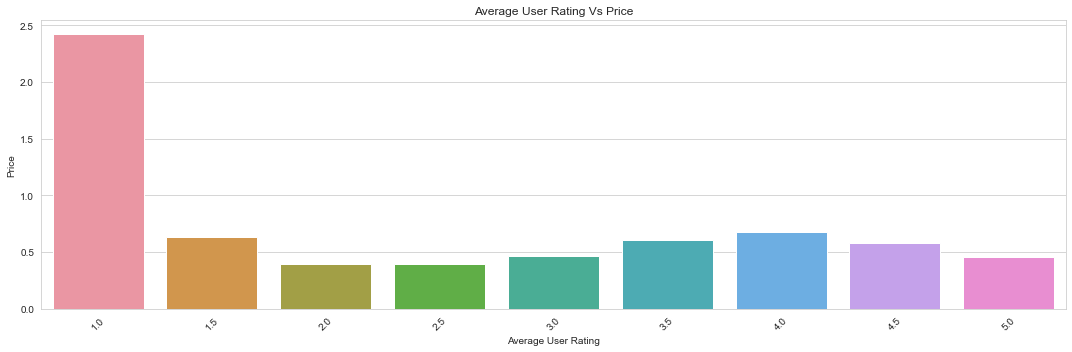

In [103]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Average User Rating', y='Price', data=by_average_user_rating)
plt.title('Average User Rating Vs Price')
plt.tight_layout()

In [104]:
by_price = df.groupby('Price').mean()

In [105]:
by_price.reset_index(inplace=True)

In [106]:
by_price = by_price.sort_values(by='Average User Rating', ascending=False)

In [107]:
by_price

,Price,Average User Rating,User Rating Count,In-app Purchases,Total Price,Age Rating,Size,days_upto_last_updated,Count,Year Of Release
18,139.99,4.500000,1099.000000,72.000000,211.990000,4.000000,127.166016,2116.000000,1.0,2013.000000
7,6.99,4.173077,570.461538,1.923077,8.913077,8.384615,408.888184,923.115385,1.0,2015.423077
11,11.99,4.166667,169.666667,0.000000,11.990000,6.666667,950.450521,1333.333333,1.0,2013.333333
9,8.99,4.166667,173.583333,0.916667,9.906667,4.000000,166.214437,1135.750000,1.0,2014.833333
4,3.99,4.161905,1010.600000,5.428571,9.418571,7.257143,241.339100,1118.628571,1.0,2014.257143
8,7.99,4.150000,3452.800000,1.100000,9.090000,7.100000,352.845020,2209.600000,1.0,2011.600000
15,19.99,4.100000,145.800000,48.000000,67.990000,8.600000,736.856250,1050.200000,1.0,2013.200000
0,0.00,4.071225,3601.698972,44.845375,44.845375,6.799526,131.300469,589.360949,1.0,2015.083320
10,9.99,4.062500,583.312500,2.104167,12.094167,9.375000,746.992647,757.958333,1.0,2015.020833
5,4.99,4.062162,1654.118919,8.454054,13.444054,8.335135,365.593988,1030.524324,1.0,2014.632432


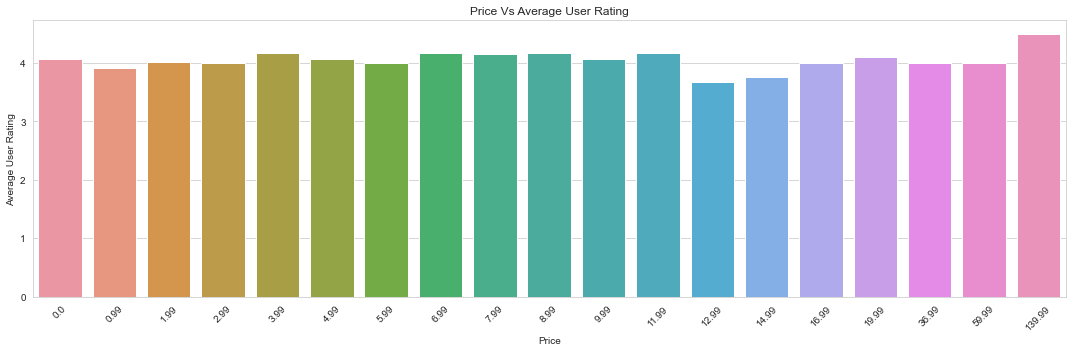

In [108]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='Price', y='Average User Rating', data=by_price)
plt.title('Price Vs Average User Rating')
plt.tight_layout()

#### People gave high rating to games with high price and mid - range games.

# Inferences

## We are given data about apps available on apple store

1. To get a user rating of 4.0 and above we should focus on game size > 35 MB upto 80 MB
2. If, we are having size of  our game > 1 GB then certainly it will get minimum Average User Rating of 2.5.
3. As Price Increases, In-app Purchases Decrease.
4. Most of the Games in each Genre has an average user rating of 4.0 and above
5. From above plot we can see that most of the games are rated for age 4+, but the games like Action, Role Playing are rated for 9+ age group.
6. We can focus on games of Genres like Health & Fitness, Music, Casual, Education, Casino, Social Networking, Puzzle, Family, Action, Adventure, Role Playig, Strategy, Card , Sports, Adventure to get an average user rating of 4.0 and above
7. Most people used to play games of genres like Action, Role Playing, Simulation, Adventre, Sports. Also, there is less competition in genres like Card, Casino, Casual, Family, Board, Puzzle, Racing, Strategy, so it is easy to get average user rating of 4.0 and above in these genres.
8. We can easily see that games of Genres like Board, Education, Simulation, Lifestyle, Card, Role Playing, Adventure games are costlier than other.
9. Games in Genres like Role Playing, Action,, Adventure, Simulation, Strategy are larger in size than Genres like, Socia Networking, Casiono, Trivia, Word, Health and fitness, lifestyle while others are intermediate in size.
10. Games in Genre Role Playing are contain more In-app Purchases than Genres like Action, Simulation, Strategy, Sports, Adventure, Card, Music and others.
11. Games in Genres like Lifestyle, Board, Card, Education, Word, Puzzle are more frequentyly updated than Role Playing, Sports, Simulation, Action, Family, Adventure, Social Networking and all.
12. As years passed, size of games increases.
13. As years passed, people starts to give good ratings to the games.
14. As years passed, price of games decreases day by day.
15. As years passed, In-app Purchases of games increases day by day.
16. As years passed, overall price (Price + In-app Purchases) of games increases day by day.
17. Most peple give ratings 4.5, 5.0, 3.5 to the games.
18. People gave high rating to games with high price and mid - range games.

Submitted By : <br/>
Sushil Kumar<br/>
sushilkumar168141@gmail.com<br/>
sk26911261326@gmail.com<br/>
Google Classroom Name - ML2B14<br/>
Feb Batch.<br/>